In [67]:
import numpy as np
import pandas as pd

import folium
import geopandas as gpd
from folium.plugins import TimeSliderChoropleth

In [75]:
df_covid = pd.read_csv('./complete.csv')
df_covid.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0


36


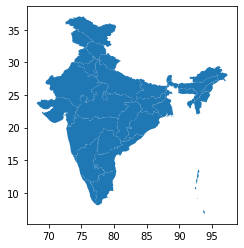

In [76]:
india_geojson = gpd.read_file('./india.json')
india_geojson = india_geojson.dissolve(by='st_nm')

print(len(india_geojson))
india_geojson.head()
india_geojson.plot()

In [77]:
df_covid['Date'] = pd.to_datetime(df_covid['Date']).apply(lambda x: x - pd.DateOffset(days=1))
df_covid.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-29,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-01-31,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-01,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0


In [79]:
df_covid['Name of State / UT'].unique()

array(['Kerala', 'Delhi', 'Telengana', 'Haryana', 'Rajasthan',
       'Uttar Pradesh', 'Tamil Nadu', 'Union Territory of Ladakh',
       'Karnataka', 'Maharashtra', 'Punjab',
       'Union Territory of Jammu and Kashmir', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal',
       'Chhattisgarh', 'Union Territory of Chandigarh', 'Gujarat',
       'Chandigarh', 'Himachal Pradesh', 'Jammu and Kashmir', 'Ladakh',
       'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram',
       'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim', 'Nagaland',
       'Telangana', 'Telangana***'], dtype=object)

In [80]:
df_covid['Name of State / UT'].replace('Telengana', 'Telangana', inplace=True)
df_covid['Name of State / UT'].replace('Telangana***', 'Telangana', inplace=True)
df_covid['Name of State / UT'].replace('Union Territory of Ladakh', 'Ladakh', inplace=True)
df_covid['Name of State / UT'].replace('Union Territory of Jammu and Kashmir', 'Jammu and Kashmir', inplace=True)
df_covid['Name of State / UT'].replace('Union Territory of Chandigarh', 'Chandigarh', inplace=True)
df_covid['Name of State / UT'].replace('Dadra and Nagar Haveli and Daman and Diu', 'Dadra and Nagar Haveli', inplace=True)

print(len(df_covid['Name of State / UT'].unique()))
df_covid['Name of State / UT'].unique()

35


array(['Kerala', 'Delhi', 'Telangana', 'Haryana', 'Rajasthan',
       'Uttar Pradesh', 'Tamil Nadu', 'Ladakh', 'Karnataka',
       'Maharashtra', 'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal',
       'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh',
       'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram',
       'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura', 'Meghalaya',
       'Dadra and Nagar Haveli', 'Sikkim', 'Nagaland'], dtype=object)

In [81]:
id_dict={'Andaman and Nicobar Islands': '0',
         'Arunachal Pradesh': '1',
         'Assam': '2',
         'Bihar': '3',
         'Chandigarh': '4',
         'Chhattisgarh': '5',
         'Dadra and Nagar Haveli': '6',
         'Daman and Diu': '7',
         'Goa': '8',
         'Gujarat': '9',
         'Haryana': '10',
         'Himachal Pradesh': '11',
         'Jharkhand': '12',
         'Karnataka': '13',
         'Kerala': '14',
         'Lakshadweep': '15',
         'Madhya Pradesh': '16',
         'Maharashtra': '17',
         'Manipur': '18',
         'Meghalaya': '19',
         'Mizoram': '20',
         'Nagaland': '21',
         'Delhi': '22',
         'Puducherry': '23',
         'Punjab': '24',
         'Rajasthan': '25',
         'Sikkim': '26',
         'Tamil Nadu': '27',
         'Telangana': '28',
         'Tripura': '29',
         'Uttar Pradesh': '30',
         'Uttarakhand': '31',
         'West Bengal': '32',
         'Odisha': '33',
         'Andhra Pradesh': '34',
         'Jammu and Kashmir': '35',
         'Ladakh': '36'}

df_covid['state_id']=df_covid['Name of State / UT'].map(id_dict)
df_covid.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,state_id
0,2020-01-29,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0,14
1,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0,14
2,2020-01-31,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0,14
3,2020-02-01,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0,14
4,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0,14


In [82]:
df_covid['Active Cases']  = df_covid['Total Confirmed cases'] - (df_covid['Cured/Discharged/Migrated'] + df_covid['Death'].replace('0#', '0').astype(float))

df_covid.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,state_id,Active Cases
0,2020-01-29,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0,14,1.0
1,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0,14,1.0
2,2020-01-31,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0,14,2.0
3,2020-02-01,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0,14,3.0
4,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0,14,3.0


In [83]:
bins=np.linspace(min(df_covid['Active Cases']),max(df_covid['Active Cases']),11)
bins

array([     0. ,  15096.6,  30193.2,  45289.8,  60386.4,  75483. ,
        90579.6, 105676.2, 120772.8, 135869.4, 150966. ])

In [84]:
# Coloring states and UTs with active COVID-19 cases
df_covid['color']=pd.cut(df_covid['Active Cases'],bins,labels=['#FFEBEB','#F8D2D4','#F2B9BE','#EBA1A8','#E58892','#DE6F7C','#D85766','#D13E50','#CB253A','#C50D24'],include_lowest=False)

# Coloring states and UTs with no active cases but previously had
df_covid['color'].replace(np.nan,'#32CD32',inplace=True)

In [85]:
df_covid=df_covid[['Date','state_id','color']]

df_covid.head()

,Date,state_id,color
0,2020-01-29,14,#FFEBEB
1,2020-01-30,14,#FFEBEB
2,2020-01-31,14,#FFEBEB
3,2020-02-01,14,#FFEBEB
4,2020-02-02,14,#FFEBEB


In [86]:
for date in df_covid['Date'].unique():
    diff=set([str(i) for i in range(37)])-set(df_covid[df_covid['Date']==date]['state_id'])
    for i in diff:
        df_covid=pd.concat([df_covid,pd.DataFrame([[date,'#0073CF',i]],columns=['Date','color','state_id'])],ignore_index=True)

df_covid.sort_values('Date',inplace=True)

In [46]:
df_covid['Date']=(df_covid['Date'].astype(np.int64) // 10**9).astype('U10')

covid_dict={}

for i in df_covid['state_id'].unique():
    covid_dict[i]={}
    for j in df_covid[df_covid['state_id']==i].set_index(['state_id']).values: 
        covid_dict[i][j[0]]={'color':j[1],'opacity':0.7}

In [47]:
list(covid_dict.items())[10]

('34',
 {1580256000: {'color': '#0073CF', 'opacity': 0.7},
  1580342400: {'color': '#0073CF', 'opacity': 0.7},
  1580428800: {'color': '#0073CF', 'opacity': 0.7},
  1580515200: {'color': '#0073CF', 'opacity': 0.7},
  1580601600: {'color': '#0073CF', 'opacity': 0.7},
  1580688000: {'color': '#0073CF', 'opacity': 0.7},
  1580774400: {'color': '#0073CF', 'opacity': 0.7},
  1580860800: {'color': '#0073CF', 'opacity': 0.7},
  1580947200: {'color': '#0073CF', 'opacity': 0.7},
  1581033600: {'color': '#0073CF', 'opacity': 0.7},
  1581120000: {'color': '#0073CF', 'opacity': 0.7},
  1581206400: {'color': '#0073CF', 'opacity': 0.7},
  1581292800: {'color': '#0073CF', 'opacity': 0.7},
  1581379200: {'color': '#0073CF', 'opacity': 0.7},
  1581465600: {'color': '#0073CF', 'opacity': 0.7},
  1581552000: {'color': '#0073CF', 'opacity': 0.7},
  1581638400: {'color': '#0073CF', 'opacity': 0.7},
  1581724800: {'color': '#0073CF', 'opacity': 0.7},
  1581811200: {'color': '#0073CF', 'opacity': 0.7},
  158

In [43]:
df_covid.dtypes

Date        datetime64[ns]
state_id            object
color               object
dtype: object

In [65]:
india_geojson['state_index'] = india_geojson.index.to_series().map(id_dict)
india_geojson = india_geojson.set_index('state_index')
india_geojson.head()

,geometry,id,district,dt_code,st_code,year
state_index,,,,,,
0,"MULTIPOLYGON (((93.83678 7.24066, 93.86890 7.2...",None,North and Middle Andaman,639,35,2011_c
34,"POLYGON ((79.28350 13.12324, 79.22845 13.15761...",None,Srikakulam,542,37,2011_c
1,"POLYGON ((95.36903 27.10999, 95.37667 27.09624...",None,Upper Subansiri,249,12,2011_c
2,"POLYGON ((92.76176 24.51308, 92.68989 24.35361...",None,Tinsukia,309,18,2011_c
3,"POLYGON ((85.37426 24.55432, 85.33144 24.51033...",None,West Champaran,203,10,2011_c


In [73]:
geometry_data = india_geojson[["geometry"]]
print(len(geometry_data))
geometry_data.head()

36
38


,geometry
state_index,
0,"MULTIPOLYGON (((93.83678 7.24066, 93.86890 7.2..."
34,"POLYGON ((79.28350 13.12324, 79.22845 13.15761..."
1,"POLYGON ((95.36903 27.10999, 95.37667 27.09624..."
2,"POLYGON ((92.76176 24.51308, 92.68989 24.35361..."
3,"POLYGON ((85.37426 24.55432, 85.33144 24.51033..."


In [95]:
m = folium.Map([0.0, 0.0], tiles='openstreetmap', zoom_start=2)
ts = TimeSliderChoropleth(geometry_data.to_json(),
                         styledict=covid_dict).add_to(m)
m